In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv("C:\Users\master pc\Downloads\Telegram Desktop\housing_data.csv")

In [3]:
# Inspect data
print(df.head())
print(df.info())

         Date  Average Home Price  Interest Rate (%)  Sales Volume  \
0  31/01/2019         302483.5708           3.952083    188.000000   
1  28/02/2019         301434.5482           3.978602    194.847458   
2  31/03/2019         307466.0952           3.878068    206.694915   
3  30/04/2019         313896.6835           3.855078    179.542373   
4  31/05/2019         307093.4768           4.036570    195.389830   

     Inventory  
0  4856.939258  
1  5137.614465  
2  4857.316504  
3  5048.376464  
4  5015.894029  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
Date                  60 non-null object
Average Home Price    60 non-null float64
Interest Rate (%)     60 non-null float64
Sales Volume          60 non-null float64
Inventory             60 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [4]:
# Convert date columns to datetime format
df['Date'] = pd.to_datetime(df['Date'])
print(df.head())
print(df.info())

        Date  Average Home Price  Interest Rate (%)  Sales Volume    Inventory
0 2019-01-31         302483.5708           3.952083    188.000000  4856.939258
1 2019-02-28         301434.5482           3.978602    194.847458  5137.614465
2 2019-03-31         307466.0952           3.878068    206.694915  4857.316504
3 2019-04-30         313896.6835           3.855078    179.542373  5048.376464
4 2019-05-31         307093.4768           4.036570    195.389830  5015.894029
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
Date                  60 non-null datetime64[ns]
Average Home Price    60 non-null float64
Interest Rate (%)     60 non-null float64
Sales Volume          60 non-null float64
Inventory             60 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.4 KB
None


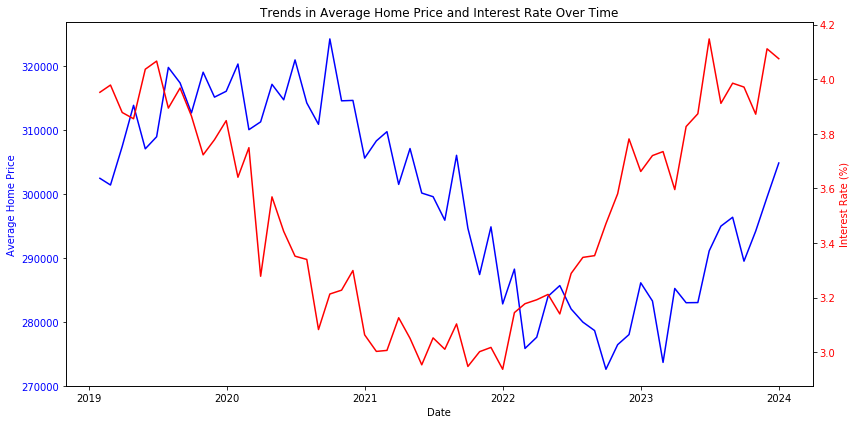

In [5]:
# Track trends
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

# Register converters to avoid warnings
register_matplotlib_converters()

# Create the plot with a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Average Home Price on the primary y-axis (left)
ax1.plot(df['Date'], df['Average Home Price'], color='b', label='Average Home Price')
ax1.set_xlabel("Date")
ax1.set_ylabel("Average Home Price", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis (right) for Interest Rate
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Interest Rate (%)'], color='r', label='Interest Rate')
ax2.set_ylabel("Interest Rate (%)", color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add title and legends
plt.title("Trends in Average Home Price and Interest Rate Over Time")
fig.tight_layout()  # Adjust layout to prevent overlapping

plt.show()


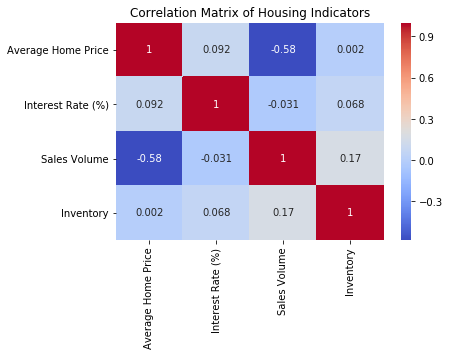

In [6]:
# Correlation analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Housing Indicators")
plt.show()

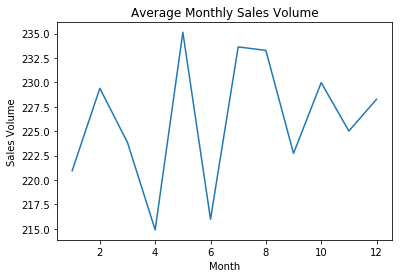

In [7]:
# Seasonal analysis
df['Month'] = df['Date'].dt.month
monthly_avg_sales = df.groupby('Month')['Sales Volume'].mean()
plt.plot(monthly_avg_sales)
plt.title("Average Monthly Sales Volume")
plt.xlabel("Month")
plt.ylabel("Sales Volume")
plt.show()

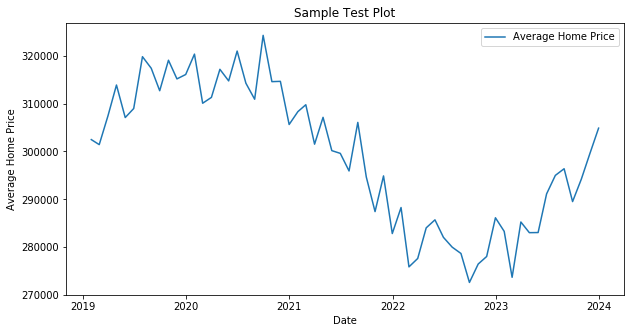

In [8]:
# Load and process data without decomposition first
import pandas as pd

# Use a subset of the data to start
df_sample = df.iloc[:500]  # First 500 rows only

# Check for missing values and fill if needed
df_sample['Average Home Price'] = df_sample['Average Home Price'].fillna(method='ffill')

# Plot a simple line chart as a test
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_sample['Date'], df_sample['Average Home Price'], label='Average Home Price')
plt.xlabel('Date')
plt.ylabel('Average Home Price')
plt.legend()
plt.title("Sample Test Plot")
plt.show()

In [10]:
# Check data types, missing values, and overall shape
print(df.info())
print(df.describe())
print(df.isna().sum())

# Forward-fill any missing values in 'Average Home Price'
df['Average Home Price'] = df['Average Home Price'].fillna(method='ffill')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
Date                  60 non-null datetime64[ns]
Average Home Price    60 non-null float64
Interest Rate (%)     60 non-null float64
Sales Volume          60 non-null float64
Inventory             60 non-null float64
Month                 60 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 2.8 KB
None
       Average Home Price  Interest Rate (%)  Sales Volume    Inventory  \
count           60.000000          60.000000     60.000000    60.000000   
mean        299226.726580           3.507965    226.083333  5041.184279   
std          14669.555404           0.382589     20.722655   223.192025   
min         272614.477800           2.936992    179.542373  4409.373651   
25%         285593.158800           3.143474    211.758475  4875.828679   
50%         300806.312350           3.519721    227.610169  5046.201798   
75%         311659.749125           3.8670

In [12]:
import pandas as pd

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert to datetime

# Drop any rows where 'Date' conversion failed (if any dates were invalid)
df = df.dropna(subset=['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Now resample to monthly frequency, using forward fill for missing data
df = df.resample('M').ffill()



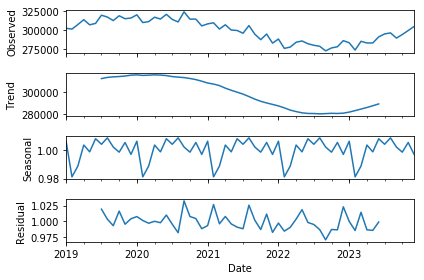

In [13]:
# Perform Seasonal Decomposition on a Larger Subset
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Test decomposition on a larger subset of data
df_sample = df['Average Home Price'].iloc[:1000]  # Adjust as needed
result = seasonal_decompose(df_sample, model='multiplicative')
result.plot()
plt.show()


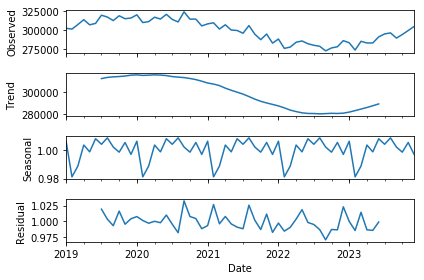

In [22]:
# Run the Full Decomposition (If the Above Works Smoothly)
result_full = seasonal_decompose(df['Average Home Price'], model='multiplicative')
result_full.plot()

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure 'Date' is a datetime object and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Sample first 100 rows to test (if dataset is large)
df_sample = df['Average Home Price'].iloc[:100]  # Adjust to the number of rows you'd like to test

# Use seasonal decomposition on the sample data
result = seasonal_decompose(df_sample, model='multiplicative', period=12)

# Plot the decomposed components without setting too many customizations
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
result.observed.plot(ax=axes[0], legend=False, color="blue")
axes[0].set_ylabel('Observed')

result.trend.plot(ax=axes[1], legend=False, color="green")
axes[1].set_ylabel('Trend')

result.seasonal.plot(ax=axes[2], legend=False, color="purple")
axes[2].set_ylabel('Seasonal')

# Add simplified x-axis ticks
plt.tight_layout()
plt.show()
